> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: ANALYSING TMDB-MOVIES DATA - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Column Description

##### id : id of the movie
##### imdb_id : the rating id
##### popularity: tells how popular the movie is, higher value implies greater popularity
##### budget: cost of producing the movie 
##### revenue: proceeds from the sales of movie
##### original_title: Title of the movies
##### cast: names of some few cast that featured in the movie 
##### homepage: link to the movie  
##### director: name(s) of director(s) of movie
##### tagline: a catch phrase to each movie 
##### keyword: the highlighted word in the movie title 
##### overview: a small narative about the movie
##### runtime: the lenght of the movie in minutes
##### genres: the genre of the movie, a movie can have multiple genres
##### production_companies: company or companies which produced the movie
##### release_date: the date the movie was released 
##### vote_count: number of upvotes received from persons who watched the movie
##### vote_average: the rating of the movie
##### release_year: year movie was released
##### budget_adj: budget of movie adjusted for inflation
##### revenue_adj: revenue of movie adjusted for inflation

### Question(s) for Analysis
> 1. What is the relationship between budget and revenue? How have they changed over time?
> 2. What other features are associated with higher revenue? Focus wil be on popularity and release month?
> 3. Who is the most succeful director based on number of movies produced, movie with the most profit and both?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#checking for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
 

>Dropping columns that will be irrelevant to the study before cheking and dropping rows with null values to avoid the loss of some rows 
Most of the columns i will be dropping have significant number of null values

In [9]:
#dropping unwanted columns
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','genres','production_companies','budget_adj','revenue_adj'],axis=1, inplace=True)

In [10]:
# checking to see if the remaining columns are what is prefered 
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015


### Addressing missing data after removing irrelevant columns

In [11]:
#introducing a new column called "release_month"
df['release_month'] = pd.DatetimeIndex(df['release_date']).month_name()

df.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,release_month
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,June
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,May
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,March
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,December
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,April


In [12]:
# True implies there are null values
df.isnull().sum().any()


True

In [13]:
#droppig null values 
df.dropna(inplace = True)

In [14]:
# verifying if null values have been dropped. Outpul must be False
df.isnull().sum().any()

False

### Addressing duplicate data

In [15]:
#checking for duplicates
sum(df.duplicated())

1

In [16]:
#Dropping duplicates
df.drop_duplicates(inplace=True)


In [17]:
#confirming is there are no duplicates
sum(df.duplicated())

0

### Addressing incorrect datatype

In [18]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
release_month      object
dtype: object

In [19]:
#changing date from string to datetime datatype
df['release_date'] = pd.to_datetime(df['release_date'])


In [20]:
#confirming if all all is set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 12 columns):
id                10821 non-null int64
popularity        10821 non-null float64
budget            10821 non-null int64
revenue           10821 non-null int64
original_title    10821 non-null object
director          10821 non-null object
runtime           10821 non-null int64
release_date      10821 non-null datetime64[ns]
vote_count        10821 non-null int64
vote_average      10821 non-null float64
release_year      10821 non-null int64
release_month     10821 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1  What is the relationship between Budget and Revenue? How have they changed over time?

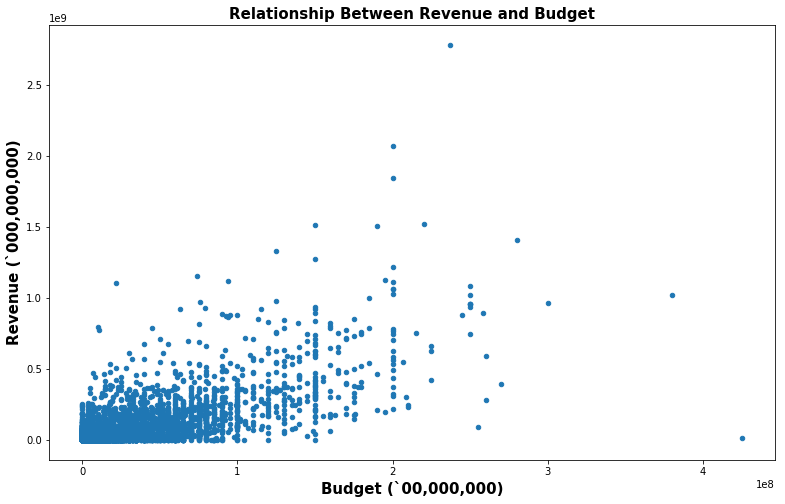

In [21]:
#Checking if higher budget implies greater revenue
def Scatterploter(df, xAxis,yAxis,xlabel,ylabel,title):
    """Take the dataset,the columns(x,y) of interest,the labels(x,y) and the title.
    Plot a scatterplot.
    """
    df.plot(x=xAxis, y=yAxis,kind='scatter',figsize=(13,8))
    plt.title(title, fontsize=15,weight='bold')
    plt.xlabel(xlabel,fontsize=15,weight='bold')
    plt.ylabel(ylabel,fontsize=15,weight='bold')

Scatterploter(df = df,
              xAxis='budget',
              yAxis='revenue',
              xlabel='Budget (`00,000,000)',
              ylabel='Revenue (`000,000,000)',
              title='Relationship Between Revenue and Budget'
              )        

> From the scatter plot above, movies that cost a lost to produce generate the most revenue. However that couldnt always be the case. 

>I'll go ahead to chech the trend of both revenue and budget to see how they behave over time.

#### Checking the trend of average revenue and budget 

In [22]:
#finding the mean budget and revenue for every year
mean_budget_revenue = df.groupby('release_year')['budget','revenue'].mean()

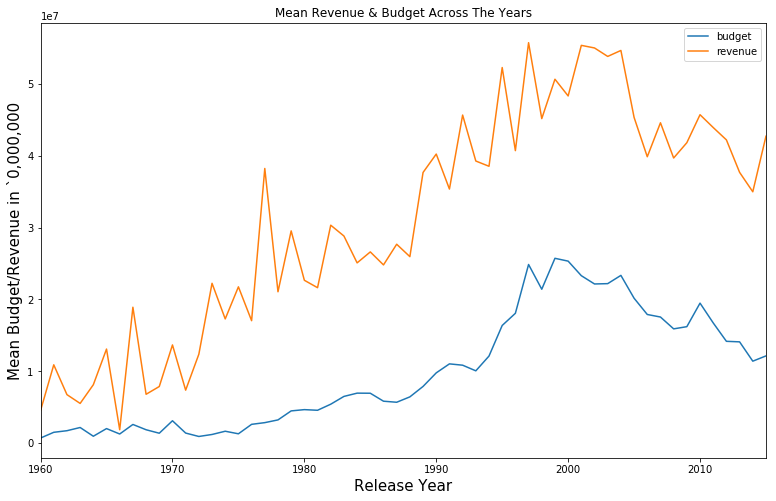

In [23]:
mean_budget_revenue.plot(figsize=(13,8))
plt.title('Mean Revenue & Budget Across The Years')
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Mean Budget/Revenue in `0,000,000',fontsize=15);



> Generally, Revenue and budget seem to have the same trend, hence a higher budget can promise a greater revenue. They both increased in the same manner from 1960 until around 2000 where they both happen to decline. However, there was and exceptional case in the year 1967 where revenue declined drastically as the expense of increasing budget.

### Research Question 2 : Some other features (release_month and popularity) associated with higher revenue?
 

In [24]:
#Checking which release_month is associated with higher revenue
month_revenue = df.groupby('release_month')['revenue'].mean()
month_revenue

release_month
April        3.311576e+07
August       2.793615e+07
December     5.946053e+07
February     2.872828e+07
January      1.425108e+07
July         5.707072e+07
June         7.455935e+07
March        3.828652e+07
May          6.236695e+07
November     5.687268e+07
October      2.554718e+07
September    1.939072e+07
Name: revenue, dtype: float64

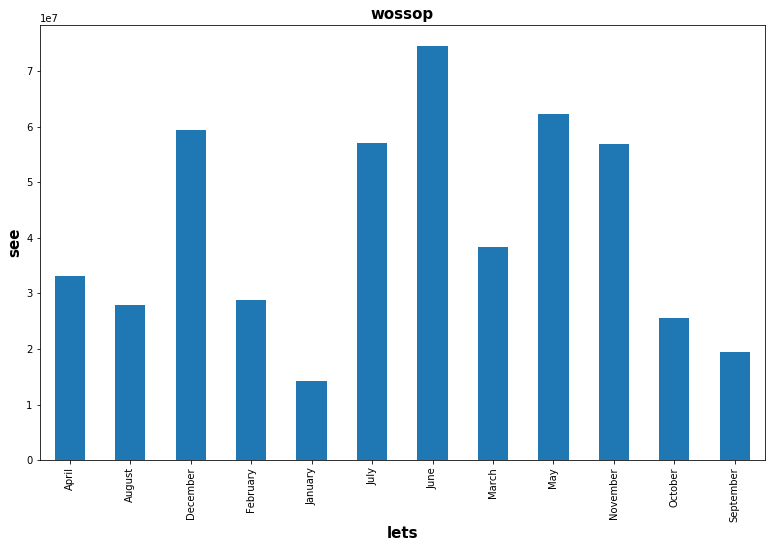

In [25]:
def Barploter(df,xAxis,xlabel,ylabel,title):
    df.plot(kind='bar',x=xAxis,figsize =(13,8))
    plt.xlabel(xlabel,fontsize=15,weight='bold')
    plt.ylabel(ylabel,fontsize=15,weight='bold')
    plt.title(title,fontsize=15,weight='bold')

Barploter(df=month_revenue,
          xAxis='release_month',
          xlabel='lets',
          ylabel='see',
          title='wossop')    


> Movies released in the month of June appear to generate the most revenue where movies released in January generated the least revenue. 

> To be sure if the above finding is not being influenced by other factors like June experiencing the most movie releases hence the greater revenue, i will draw a bar graph of the movie count with respect to each month to see the most movies were release in June.

In [26]:
releasemonth_movie_count = df.groupby('release_month')['original_title'].count()
releasemonth_movie_count

release_month
April         797
August        912
December      979
February      689
January       910
July          795
June          827
March         820
May           809
November      807
October      1149
September    1327
Name: original_title, dtype: int64

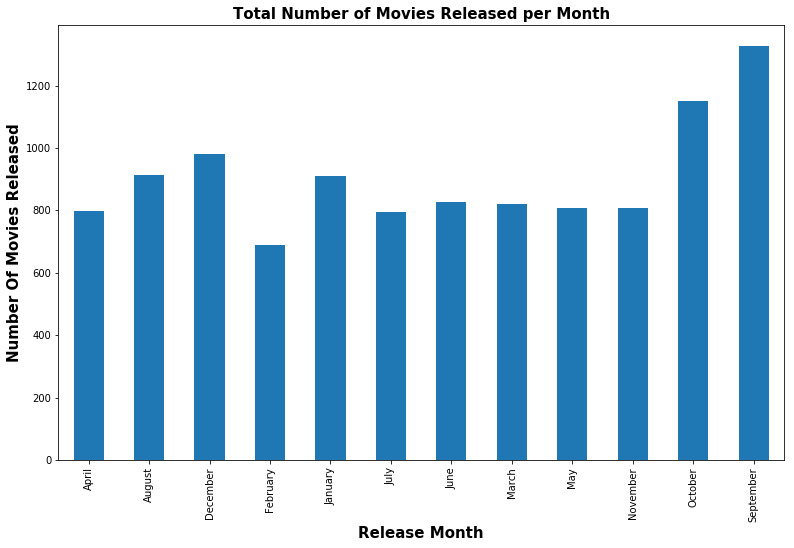

In [27]:
Barploter(df=releasemonth_movie_count,
          xAxis ='release_month',
          xlabel ='Release Month',
          ylabel ='Number Of Movies Released',
          title ='Total Number of Movies Released per Month')

>The most number of movies were released in September; followed by October, December, August, January, June and so on. Which shows that the high revenue generated from movies released in June is not attributed to the greater number of movie releases in June.

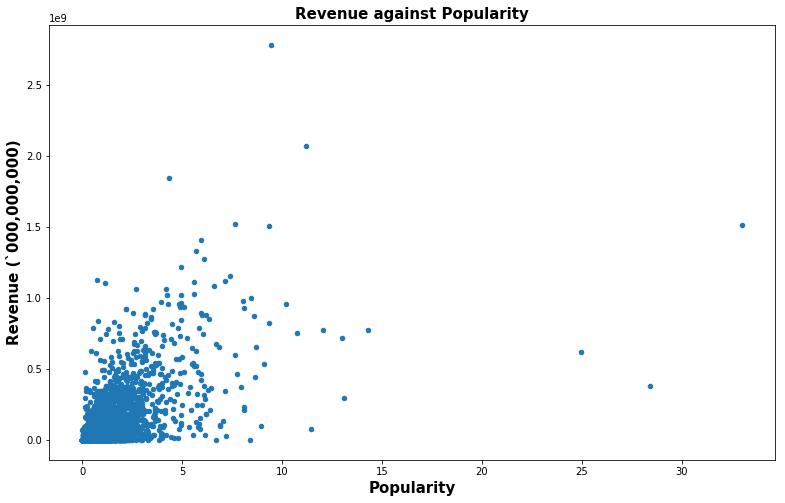

In [28]:
#checking if populaity influences higher revenue
Scatterploter(df = df,
              xAxis ='popularity',
              yAxis ='revenue',
              xlabel ='Popularity',
              ylabel ='Revenue (`000,000,000)',
              title='Revenue against Popularity')


>Considering the scatter plot above, it is evident that the more popular movies generate greater revenue

### Research Question 3: Who is the most succesfull Director based on profit generated, number of movies directed, and both? 

In [29]:
#introducing a profit column
df['profit'] = df['revenue']- df['budget']
df.head(1)


,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,release_month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,June,1363528810


In [30]:
#ranking the top 20 directors based on profit generated from the movies they directed
top20_directors = df[['profit','director']].sort_values('profit',ascending =False)
top20_directors.head(5)

,profit,director
1386,2544505847,James Cameron
3,1868178225,J.J. Abrams
5231,1645034188,James Cameron
0,1363528810,Colin Trevorrow
4,1316249360,James Wan


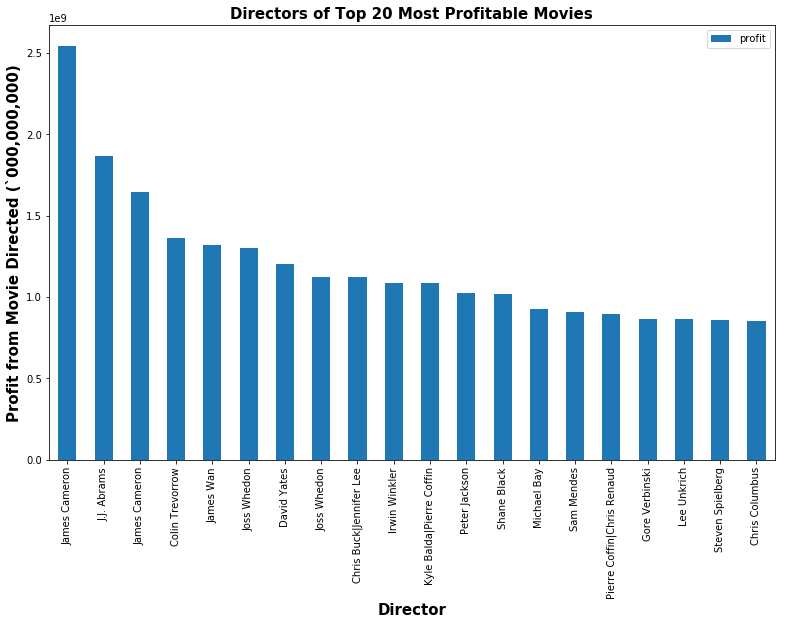

In [31]:
Barploter(df=top20_directors.head(20),
          xAxis='director',
          xlabel='Director',
          ylabel='Profit from Movie Directed (`000,000,000)',
          title='Directors of Top 20 Most Profitable Movies')    


> From the bar plot above, James Cameronn will be the most successful director based on most profit generated from the movies each directed.

> We'll further check which director directed the most number of movies. 

In [32]:
#ranking top 20 directors based on the number of movies directed
most_movies = df.groupby('director')['original_title'].count().sort_values(ascending = False)
most_movies.head(20)

director
Woody Allen             45
Clint Eastwood          34
Steven Spielberg        29
Martin Scorsese         29
Ridley Scott            23
Steven Soderbergh       22
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Wes Craven              19
Barry Levinson          19
Tim Burton              19
Mike Nichols            18
David Cronenberg        18
John Carpenter          18
Rob Reiner              18
Renny Harlin            17
Sidney Lumet            17
Oliver Stone            17
Francis Ford Coppola    17
Name: original_title, dtype: int64

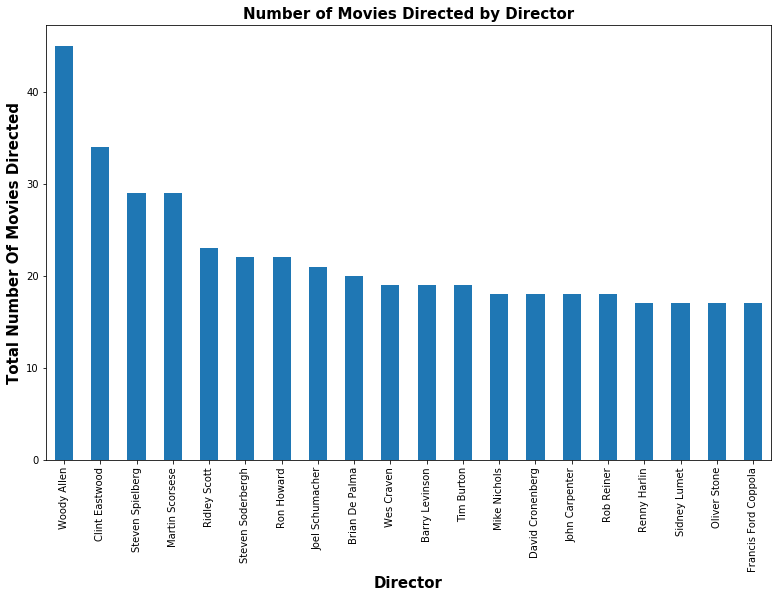

In [33]:
Barploter(df=most_movies.head(20),
          xAxis='director',
          xlabel='Director',
          ylabel='Total Number Of Movies Directed',
          title='Number of Movies Directed by Director')    


> Here, Woody Allen will be rank the most successful dierector based on the most number of movies directed.


#### For both criteria, Steven Spielberg will be ranked the most successful director only for showing in both both rankings.

<a id='conclusions'></a>
## Conclusions

> 1. To check if 'revenue' generated from a movie and 'budget' were correlated, I plotted a scatterplot of revenue against budget and the results showed a positive correlation between the two. However, there were some points on the plot which showed otherwise. I further plotted a trend graph to investigate their behavior over the years. From the outcome, you'll detect a similar trend movement between the two variables with revenue trend line always above that of budget. From the two observations, I can infer that movies that cost much to produce generate more revenue for most cases. 
More research can be focused on the relationship betweeen budjet and profit since a higher revenue does not guarantee greater profit.  

>2. To test if the month a movie is released has any effect on revenue, i plotted the mean revenue for each month and June proved to have the greatest average revenue. There could be other factors whhich influenced this outcome like  'more movies were relatively released in june than the other months, hence accounting for the greatest revenue'. So to test if that was true, i ploted each month against the total number of movies released. However June was ranked sixth(6th) with September topping the list. So i could also infer that movies released in June generates the most revenue

>3. To rank who the most successful director is, i had to make some assumptions. 
i) The director who directed the movie(s) which generated the most profit is more successful. 
ii) The director(s) who directed the most number of movies per the time span of the data is the most succesful.
iii)The director whose name shows in both ranks is the most succeful.
Upon ranking directors based on the most profit made from the movie(s) they directed, James Cameron( Avatar) topped this category hence the most successful director per that standard.
For director who produced the most movie, Woody Allen who produced 45 movies, (11 more than the second on the list), was the most successful director in that category.
Steven Spielberg who happens to be in the top 20 of the two categories is also considered the most successful producer when both categories are considered as a whole.

>A limitation is that Directing more movies doesn't necessarily make one a successful director. There is a chance none of those countless movies will be truely profitable. And there is another chance that a director can direct a movie which would yeild more profit than profits from more other movies put together. Hence the assumption that the  director who directed the most movies is the most successful is not evidence enough.




In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0